# Model Creation

In [98]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [99]:
sub=pd.read_csv('Data/model_data.csv')

In [100]:
del sub['Unnamed: 0']
sub

,price,accommodates,bathrooms,bedrooms,cleaning_fee,is_location_exact,beds,Entire home/apt,Private room,Shared room,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,469.0,10,3.0,5.0,150.0,0,7.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,99.0,2,1.5,1.0,0.0,1,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,66.0,1,1.5,1.0,27.0,1,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,72.0,3,1.0,1.0,0.0,1,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,199.0,5,1.0,1.0,51.0,1,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,54.0,1,1.0,0.0,0.0,1,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,133.0,2,1.5,1.0,0.0,1,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,99.0,5,1.0,2.0,125.0,1,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,69.0,2,1.0,0.0,40.0,1,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,90.0,4,1.0,2.0,0.0,1,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [102]:

y = sub['price'].values.reshape(-1, 1)
X = sub.drop('price', axis =1)

print(X.shape, y.shape)

(22403, 154) (22403, 1)


In [103]:

#Split data into Training and Test data
#Assign ratio for Training and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=42)


In [104]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)


In [105]:
#Scaling only on X variables 
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [106]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

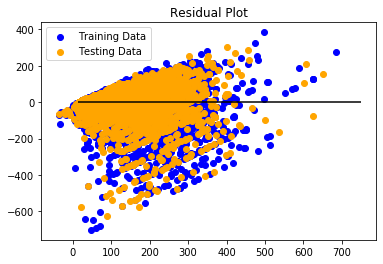

In [108]:
#Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [115]:
import pickle
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train_scaled, y_train)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_train_scaled, y_train)

print(f"MSE: {MSE}, R2: {r2}")

#save the model
# save the model to disk
#linear_model = 'linear_model.pk1'
#with open(linear_model, 'wb') as file:  
#    pickle.dump(LR_Model, file)


# Save the Modle to file in the current working directory

Pkl_Filename = "Linear_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

MSE: 5034.374324227695, R2: 0.4972867902993984


In [116]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Linear_Model = pickle.load(file)

Linear_Model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")


MSE: 5034.374324227695, R2: 0.472062908824322


In [96]:
y_pred = model.predict(X_test_scaled)
y_pred

#y_new_inverse = y_scaler.inverse_transform(y_pred)
#y_new_inverse

array([[104.20766711],
       [104.20766711],
       [146.80284691],
       ...,
       [112.28865888],
       [ 90.64903957],
       [157.32588055]])

In [118]:
# Ridge model

from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test_scaled, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 5029.8841565624, R2: 0.4725337768812916


In [119]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test_scaled, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 5029.5282843464765, R2: 0.4725710959462647
